In [92]:
import Modules.SQcircuit_extensions as sq_ext
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
import importlib
import os
import sys

importlib.reload(sq_ext)

<module 'Modules.SQcircuit_extensions' from 'C:\\Users\\gabri\\PycharmProjects\\tunable-capacitive-coupling-flux-qubits\\Modules\\SQcircuit_extensions.py'>

# Single qubit

This notebook studies the qubit proposed by KIT. It's lumped element model is:
<img src='Other/Single qubit 4 nodes CC coupled to ground.jpg' width='500'>


## Define the circuit in SQcircuit

In [93]:
# Circuit parameters
Csh = 15
C   = 15
CJ  = 3
Cg  = 20
Lq = 25
Lr = 10
Δ  = 0.1
EJ  = 10.0

# Initialize loop(s)
loop = sq.Loop(0.0)  # "Value" corresponds to phiExt / phi0 threading the loop (can change later)

# Circuit elements
C_01 = sq.Capacitor(C, 'fF')
C_02 = sq.Capacitor(C, 'fF')
C_12 = sq.Capacitor(CJ+Csh, 'fF')
C_04 = sq.Capacitor(Cg, 'fF')

L_03 = sq.Inductor(Lr, 'nH')
L_31 = sq.Inductor(Lq/2 - Δ, 'nH', loops=[loop])
L_23 = sq.Inductor(Lq/2 + Δ, 'nH', loops=[loop])

JJ = sq.Junction(EJ, 'GHz', loops=[loop])

# Create the circuit
elements = {
    # (0,4): [C_04],
    (0, 3): [L_03],
    (0, 1): [C_01],
    (0, 2): [C_02],
    (3, 1): [L_31],
    (1, 2): [C_12, JJ],
    (2, 3): [L_23],
}

qubit = sq.Circuit(elements)

In [94]:
qubit.description()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

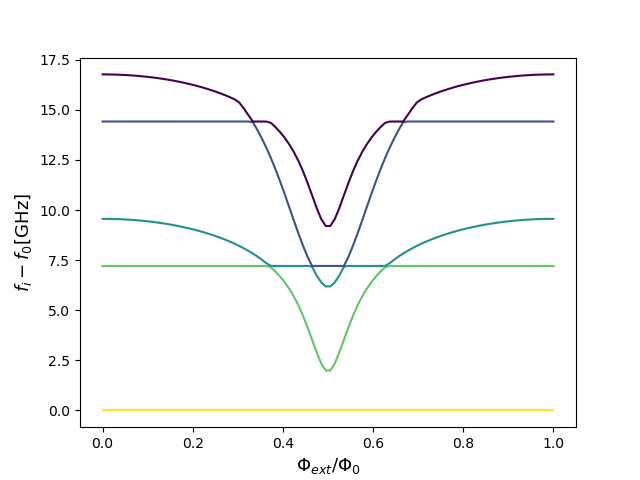

In [95]:
# external flux for sweeping over
phi = np.linspace(0,1,100)

# spectrum of the circuit
n_eig=5
spec = np.zeros((n_eig, len(phi)))

# calculate initial truncation numbers for the first value of phi
loop.set_flux(phi[0])
qubit = sq_ext.truncation_convergence(qubit, n_eig)[0]

eig_colors = plt.get_cmap('viridis_r')(np.linspace(0, 255, n_eig).astype('int'))

for i in range(len(phi)):
    # set the external flux for the loop
    loop.set_flux(phi[i])
    qubit, E_conv = sq_ext.truncation_convergence(qubit, n_eig, trunc_nums=qubit.m)

    # diagonlize the circuit
    spec[:, i] = E_conv
plt.figure()
for i in range(n_eig):
    plt.plot(phi, spec[i,:]- spec[0,:], color=eig_colors[i])

plt.xlabel(r"$\Phi_{ext}/\Phi_0$", fontsize=13)
plt.ylabel(r"$f_i-f_0$[GHz]", fontsize=13)
plt.show()